In [1]:
#Interactive Commands
%matplotlib widget

#import dependenceis
import matplotlib.pyplot as plt
import statistics
import numpy as np
from matplotlib.ticker import MultipleLocator
import pandas as pd

# Load Files
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [2]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [9]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Create DataFrames per type of city
urban_rides_df = pyber_data_df[pyber_data_df["type"]=='Urban']
suburban_rides_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_rides_df = pyber_data_df[pyber_data_df['type']=='Rural']

In [14]:
# Get ride counts for each type of city.
urban_ride_count = urban_rides_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_rides_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_rides_df.groupby(["city"]).count()["ride_id"]

In [15]:
# Get Average fare for each type of city
urban_ride_avg = urban_rides_df.groupby(['city']).mean()['fare']
suburban_ride_avg = suburban_rides_df.groupby(['city']).mean()['fare']
rural_ride_avg = rural_rides_df.groupby(['city']).mean()['fare']

In [16]:
# Get average drivers for each type of city
urban_driver_count = urban_rides_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_rides_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_rides_df.groupby(["city"]).mean()["driver_count"]

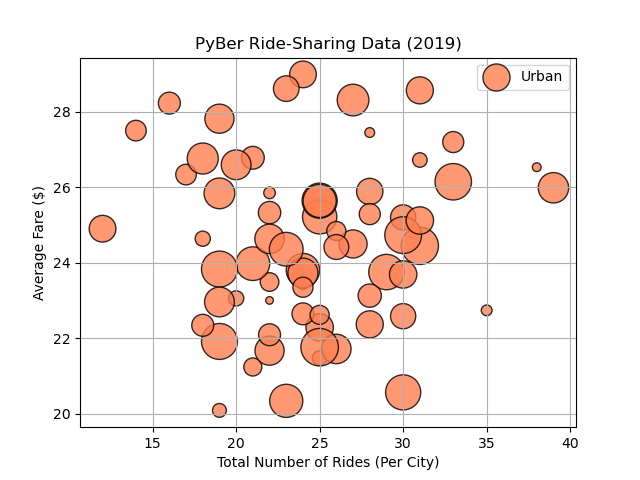

In [17]:
# Create the Urban scatter plot
fig, ax = plt.subplots()
ax.scatter(urban_ride_count,
           urban_ride_avg,
           s=[i*10 for i in urban_driver_count],
          color='coral', alpha=0.8, linewidths=1,
          edgecolor='k',label='Urban')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
ax.legend()

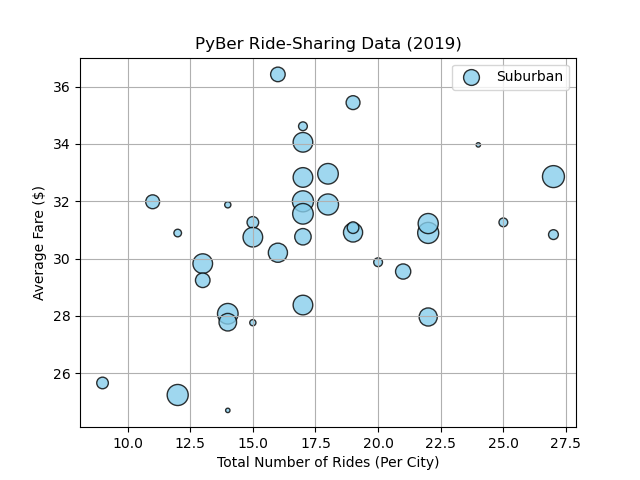

In [18]:
# Create the Urban scatter plot
fig, ax = plt.subplots()
ax.scatter(suburban_ride_count,
           suburban_ride_avg,
           s=[i*10 for i in suburban_driver_count],
          color='skyblue', alpha=0.8, linewidths=1,
          edgecolor='k',label='Suburban')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
ax.legend()

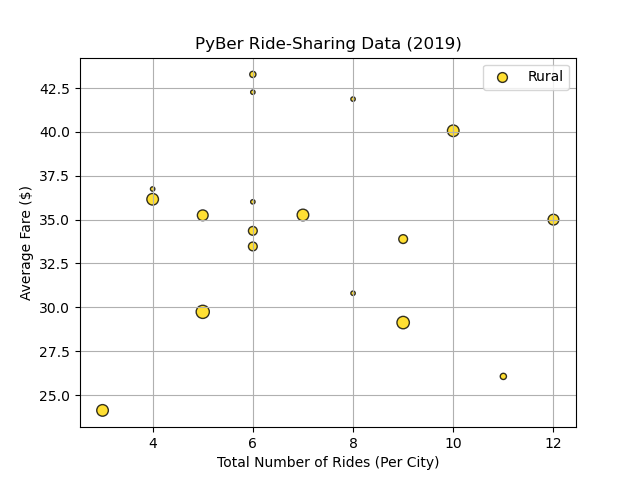

In [19]:
# Create the Urban scatter plot
fig, ax = plt.subplots()
ax.scatter(rural_ride_count,
           rural_ride_avg,
           s=[i*10 for i in rural_driver_count],
          color='gold', alpha=0.8, linewidths=1,
          edgecolor='k',label='Rural')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
ax.legend()

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

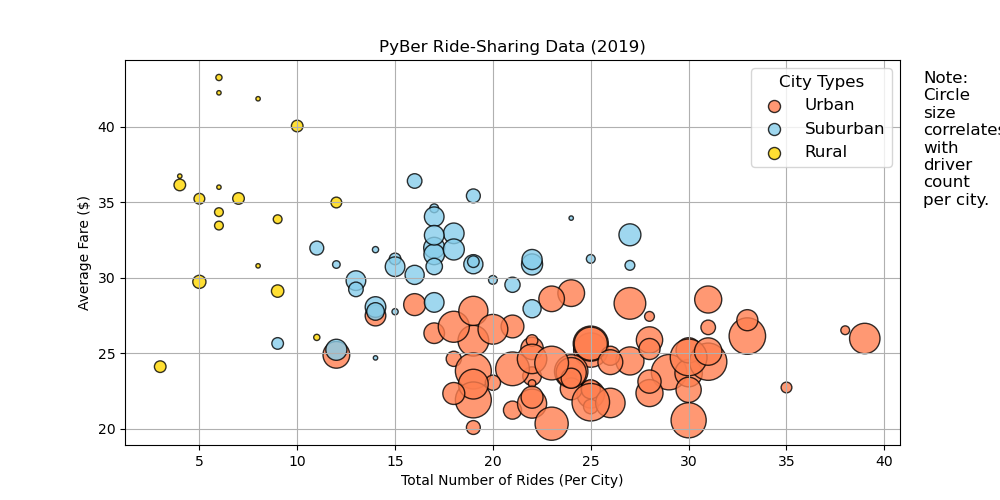

In [25]:
# Create the Combined scatter plot
fig, ax = plt.subplots(figsize=(10,5))
#Make the plots for Urban, suburban, and rural
ax.scatter(urban_ride_count,
           urban_ride_avg,
           s=[i*10 for i in urban_driver_count],
          color='coral', alpha=0.8, linewidths=1,
          edgecolor='k',label='Urban')
ax.scatter(suburban_ride_count,
           suburban_ride_avg,
           s=[i*10 for i in suburban_driver_count],
          color='skyblue', alpha=0.8, linewidths=1,
          edgecolor='k',label='Suburban')
ax.scatter(rural_ride_count,
           rural_ride_avg,
           s=[i*10 for i in rural_driver_count],
          color='gold', alpha=0.8, linewidths=1,
          edgecolor='k',label='Rural')
# Set axis titles
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
lgnd = ax.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
ax.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap=True)

In [27]:
# Save the figure.
plt.savefig("Analysis/Fig1.png")